In [ ]:
# Start with importing libraries
import re
from collections import Counter
import pandas as pd
import nltk 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

In [ ]:
given_string = "As a term, data analytics predominantly refers to an assortment of applications, from basic business \nintelligence (BI), reporting and online analytical processing (OLAP) to various forms of advanced \nanalytics. In that sense, it's similar in nature to business analytics, another umbrella term for \napproaches to analyzing data -- with the difference that the latter is oriented to business uses, while \ndata analytics has a broader focus. The expansive view of the term isn't universal, though: In some \ncases, people use data analytics specifically to mean advanced analytics, treating BI as a separate \ncategory. Data analytics initiatives can help businesses increase revenues, improve operational \nefficiency, optimize marketing campaigns and customer service efforts, respond more quickly to \nemerging market trends and gain a competitive edge over rivals -- all with the ultimate goal of \nboosting business performance. Depending on the particular application, the data that's analyzed \ncan consist of either historical records or new information that has been processed for real-time \nanalytics uses. In addition, it can come from a mix of internal systems and external data sources. At \na high level, data analytics methodologies include exploratory data analysis (EDA), which aims to find \npatterns and relationships in data, and confirmatory data analysis (CDA), which applies statistical \ntechniques to determine whether hypotheses about a data set are true or false. EDA is often \ncompared to detective work, while CDA is akin to the work of a judge or jury during a court trial -- a \ndistinction first drawn by statistician John W. Tukey in his 1977 book Exploratory Data Analysis. Data \nanalytics can also be separated into quantitative data analysis and qualitative data analysis. The \nformer involves analysis of numerical data with quantifiable variables that can be compared or \nmeasured statistically. The qualitative approach is more interpretive -- it focuses on understanding \nthe content of non-numerical data like text, images, audio and video, including common phrases, \nthemes and points of view."
print(given_string)

As a term, data analytics predominantly refers to an assortment of applications, from basic business 
intelligence (BI), reporting and online analytical processing (OLAP) to various forms of advanced 
analytics. In that sense, it's similar in nature to business analytics, another umbrella term for 
approaches to analyzing data -- with the difference that the latter is oriented to business uses, while 
data analytics has a broader focus. The expansive view of the term isn't universal, though: In some 
cases, people use data analytics specifically to mean advanced analytics, treating BI as a separate 
category. Data analytics initiatives can help businesses increase revenues, improve operational 
efficiency, optimize marketing campaigns and customer service efforts, respond more quickly to 
emerging market trends and gain a competitive edge over rivals -- all with the ultimate goal of 
boosting business performance. Depending on the particular application, the data that's analyzed 
can c

In [ ]:
given_string = given_string.lower()
line_list = given_string.splitlines()#Return a list of the lines in the string, breaking at line boundaries. 
nlines = len(line_list)
nlines

22

In [ ]:
def tokenize(string):
    return re.compile('\w+').findall(string) #compiling a regular expression, then using it to search for 
                                              #text that matches that regular expression

def word_freq(string): 
    text = tokenize(string.lower()) #tokenizes and stores
    c = Counter(text)           # count the words
    d = Counter(''.join(text))  # count all letters
    return (dict(c))    # return a tuple of counted words and letters

def return_word_freq(string): 
    text = tokenize(string.lower())
    c = Counter(text)           # count the words in the string
    d = Counter(''.join(text))  # count all letters in the string
    return (dict(c), dict(d))    # return a tuple of counted words and letters(all) counts together

words = word_freq(given_string) 
words_, letters = return_word_freq(given_string)

sumWords = sum(words.values())       # sum total words in string
sumLetters = sum(letters.values())   # sum total letters in string

In [ ]:
#testing
test="the content of non-numerical data like text, images, audio and video, including common phrases"
print(word_freq(test))
print(return_word_freq(test))


{'the': 1, 'content': 1, 'of': 1, 'non': 1, 'numerical': 1, 'data': 1, 'like': 1, 'text': 1, 'images': 1, 'audio': 1, 'and': 1, 'video': 1, 'including': 1, 'common': 1, 'phrases': 1}
({'the': 1, 'content': 1, 'of': 1, 'non': 1, 'numerical': 1, 'data': 1, 'like': 1, 'text': 1, 'images': 1, 'audio': 1, 'and': 1, 'video': 1, 'including': 1, 'common': 1, 'phrases': 1}, {'t': 6, 'h': 2, 'e': 8, 'c': 4, 'o': 7, 'n': 9, 'f': 1, 'u': 3, 'm': 4, 'r': 2, 'i': 7, 'a': 7, 'l': 3, 'd': 5, 'k': 1, 'x': 1, 'g': 2, 's': 3, 'v': 1, 'p': 1})


In [ ]:
len(words)

194

In [ ]:
{key:value for (key,value) in words.items() if value>8 } #gets words which are more than 8 in freq

{'a': 10, 'analytics': 10, 'and': 9, 'data': 18, 'of': 10, 'the': 11, 'to': 11}

#Q1 Probability of the word “data” occurring in each line

In [ ]:
data_count = words['data'] #coutn "data" word in the string


In [ ]:
# The probability of an event A is the number of ways event A can occur divided by the total number of possible outcomes.
probablity_data_in_each_line = data_count/nlines

In [ ]:
probablity_data_in_each_line

0.8181818181818182

# Q2 distribution of distinct word counts across all the lines
- We shall first find out the distinct word counts in every line,
- Create the distribution plot.

In [ ]:
distinct_counts = []
for i in line_list:
    distinct_counts.append(len(word_freq(i)))

In [ ]:
df_distinct_counts = pd.DataFrame(distinct_counts)
df_distinct_counts.rename(columns={0: "Distinct_Words"})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


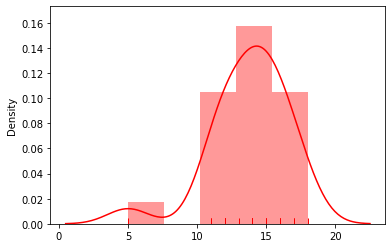

In [ ]:
import seaborn as sns
sns.distplot(df_distinct_counts, kde=True, rug=True,color='red');

#Calc probability of the word “analytics” occurring after the word “data” ?
- Lets create the bigrams,
- find "data analytics" joint occurance coutn and only "analytics" counts
- Calculate the probability by dividing them.

In [ ]:
import nltk 
import re 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import pandas as pd 


In [ ]:
#count(w2 w1) / count(w2) which is the number of times the words occurs in the required
#sequence, divided by the number of the times the word before the expected word occurs in the corpus.
import re
from collections import Counter
bigramwords = re.findall('\w+', given_string)
bigram_counts = Counter(zip(bigramwords,bigramwords[1:]))
data_analytics_count = bigram_counts[("data", "analytics")]
analytics_count = words['analytics'] #count of "Analytics" word in the string
print(f"Number of times data analytics appear together: {data_analytics_count}")
print(f"Number of times only analytics appear in complete text: {analytics_count}")

Number of times data analytics appear together: 6
Number of times only analytics appear in complete text: 10


In [ ]:
print(f"Probablity of analytics appearing after data: {data_analytics_count/analytics_count}")

Probablity of analytics appearing after data: 0.6
